## **演示0503：梯度下降算法**

### **计算过程：**
假设下列函数定义：
$ F(w) = \frac{1}{2m} \sum_{i=1}^{m}[f_w(x^{(i)}) - y^{(i)}]^2 = \frac{1}{2m} \sum_{i=1}^{m}(w_0+w_1 x^{(i)} - y^{(i)})^2 $
其中：
* $m$:样本数据点数量
* $f_w$ :以$w$为系数的拟合函数
* $x^{(i)}$:第$i$个数据的横坐标值(数据中的自变量)
* $y^{(i)}$:第$i$个数据的纵坐标值(数据中的因变量)
* $f_w(x^{(i)})$:将$x^{(i)}$ 代入到拟合函数计算的结果
* $F(w)$:也称为**目标函数**或**成本函数**  
根据最小二乘法可知,针对函数$F(w)$,要设法求出最优的$w$,从而使得$F(w)$的值最小。求解过程可以使用梯度下降法来实现。

对于只有一个自变量($x$)的情形，此时最优的$w$实际上包括$w_0$和$w_1$，使用梯度下降算法的基本步骤如下：
1. 给定目标函数$F(w)$(实际上也是$F(w_0, w_1)$)和学习速率(learning rate): $ \alpha $
2. 随机初始化$w_0$和$w_1$ ,计算出$F(w_0 , w_1)$
3. 计算出能够使$F(w)$下降最快的$w$偏移量(梯度)：$\Delta w$，叠加到初始的$w_0$和$w_1$上
  * 针对$w_0$和$w_1$，分别计算梯度$\nabla w_0$和$\nabla w_1$
  * 按下列公式调整$w_0$和$w_1$:
    * $ w_0 = w_0 - \alpha \nabla w_0 $
    * $ w_1 = w_1 - \alpha \nabla w_1 $
    * 请注意，$w_0$和$w_1$的变化方向要与导数的方向相反
  * 利用调整后的$w_0$和$w_1$，再次计算$F(w_0, w_1)$
4. 循环第3步过程，直到最近两次计算出来的目标函数的差值小于某个误差限
5. 此时$w_0$和$w_1$就是目标函数的最优解  

注意：
* 可能需要尝试及合理选择$\alpha $。$\alpha $太大，有可能越过了最优点；$\alpha $小，收敛速度会非常慢
* 当前主流的梯度算法，能够随着梯度下降循环的进行，动态调整$\alpha $值，从而能够较快的收敛，又能避免跨越最优点的情形
* 找到的最优点，也有可能是局部最优点而非全局最优点

### **算法原理示意**
下图展示了梯度下降算法的工作原理：

![](../images/050301.png)

* 选择一个初始点(即给定初始的$w$)，作为当前工作点
* 计算该点出的梯度值(导数$\dfrac{\partial F}{\partial w}$)，沿着梯度最大的方向，移动当前工作点到新的位置
* 经过若干次移动后，如果新的工作点位置对应的$F(w)$值与上一个位置几乎没有差异，则可以认为找到了极值点
* 请注意，一般来说，采用梯度下降法求取极小值（而不是极大值）

### **批量梯度下降法**
> 梯度下降法中最重要的一步是计算某个工作点的梯度$\nabla w$。有多种用于计算$\nabla w$的方法,其计算结果也会有所不同
> * 批量梯度下降法是指：在计算$\nabla w$时,要把所有样本点数据的梯度都计算进去,也就是直接针对$F(w)$来计算偏导(注意$F(w)$中包含了所有样本点的数据值)：
>
>  $ \begin{aligned} \\ 
\nabla w_0 & =\frac{\partial F(w)}{\partial w_0} \\ \\ & =\dfrac{\partial \frac{1}{2m} \sum_{i=1}^{n}(w_0+w_1 x^{(i)}-y^{(i)})^2}{\partial w_0} \\ \\
& = \dfrac{\frac{1}{2m} \cdot 2 \cdot \sum_{i=1}^m [(w_0+w_1 x^{(i)}-y^{(i)}) \cdot \partial {(w_0+w_1 x^{(i)}-y^{(i)})}]}{\partial w_0} \\ \\
& = \dfrac{1}{m} \sum_{i=1}^m [(w_0+w_1 x^{(i)}-y^{(i)}) \cdot (1+0+0)] \\ \\ & =\dfrac{1}{m} \sum_{i=1}^m (w_0+w_1 x^{(i)}-y^{(i)})
\end{aligned} $
>
>  $ \begin{aligned}
\nabla w_1 & =\frac{\partial F(w)}{\partial w_1} \\ \\ & =\dfrac{\partial \frac{1}{2m} \sum_{i=1}^{n}(w_0+w_1 x^{(i)}-y^{(i)})^2}{\partial w_1} \\ \\
& = \dfrac{\frac{1}{2m} \cdot 2 \cdot \sum_{i=1}^m [(w_0+w_1 x^{(i)}-y^{(i)}) \cdot \partial {(w_0+w_1 x^{(i)}-y^{(i)})}]}{\partial w_1} \\ \\
& = \dfrac{1}{m} \sum_{i=1}^m [(w_0+w_1 x^{(i)}-y^{(i)}) \cdot (0 + x^{(i)} + 0)] \\ \\ & =\frac{1}{m} \sum_{i=1}^m [(w_0+w_1 x^{(i)}-y^{(i)}) \cdot x^{(i)}] 
\end{aligned} $
>
> * 在梯度下降算法的每一步，计算出$\nabla w$后，代入下式中进行下一步计算：
>
>  $ w_0 = w_0-\alpha \nabla w_0 $
>
>  $ w_1 = w_1-\alpha \nabla w_1 $

### **案例1：使用批量梯度下降算法拟合直线**
> 待拟合的二维平面数据点：(6, 7), (8, 9), (10, 13), (14, 17.5), (18, 18)

>**步骤1：定义目标函数、梯度函数**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 定义目标函数，该目标函数实际上是残差平方和。相当于采用了最小二乘法。
def target_function(W, X, Y):                           
    w1, w0 = W
    return np.sum((w0 + X * w1 - Y) ** 2) / (2 * len(X))  # 应使用np.sum，而不要使用sum。np.sum支持向量/矩阵运算

# 定义梯度
# 根据目标函数，分别对x0和x1求导数(梯度)，并累计各点的导数之平均值
def gradient_function(W, X, Y):                         
    w1, w0 = W
    w0_grad = np.sum(w0 + X * w1 - Y) / len(X)      # 对应w0的导数
    w1_grad = X.dot(w0 + X * w1 - Y) / len(X)       # 对应w1的导数。注意采用向量运算
    return np.array([w1_grad, w0_grad]) 

> **步骤2：定义批量梯度下降算法计算函数**

In [3]:
# 定义最简单的批量梯度下降算法函数
def batch_gradient_descent(target_fn, gradient_fn, init_W, X, Y, learning_rate=0.001, tolerance=1e-12):
    W = init_W
    target_value = target_fn(W, X, Y)                   # 计算当前w下的F(w)值
    while True:
        gradient = gradient_fn(W, X, Y)                 # 计算梯度
        next_W = W - gradient * learning_rate           # 调整W。向量计算，同时调整了w1和w0
        next_target_value = target_fn(next_W, X, Y)     # 计算新theta下的cost值
        if abs(next_target_value - target_value) < tolerance:   # 如果两次计算之间的误差小于tolerance，则表明已经收敛
            return next_W
        else:
            W, target_value = next_W, next_target_value         # 继续进行下一轮计算

>**步骤3：执行批量梯度下降操作，获取最优权重参数解**

In [4]:
# 待拟合的数据点
x = np.array([6, 8, 10, 14, 18])
y = np.array([7, 9, 13, 17.5, 18])

np.random.seed(0)
init_W = np.array([np.random.random(), np.random.random()])      # 随机初始化W值
w1, w0 = batch_gradient_descent(target_function, gradient_function, init_W, x, y) 
print("最优的w1和w0:", w1, w0)

最优的w1和w0: 0.9763122679381336 1.9652710600118533


>**步骤4：根据最优解做出拟合曲线，并作图比较**

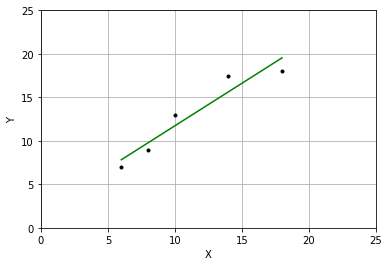

In [5]:
def initPlot():
    plt.figure()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis([0, 25, 0, 25])
    plt.grid(True)
    return plt

plt = initPlot()
plt.plot(x, y, 'k.')
plt.plot(x,  w0 + w1 * x, 'g-')     # 绘制最优拟合曲线
plt.show()

### **案例2：使用批量梯度下降算法拟合多维数据**
* 待拟合的数据点：
 * 样本点对应的x值：[[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]])
 * 样本点对应的y值：[19, 21, 23, 43, 47])
* 上述数据点是根据函数$y=3*x_1+4*x_2-7$生成的

>**步骤1：定义样本数据，并扩展一个全为1的列**

In [6]:
# 下列数据是按照y=3*x1+4*x2-7函数生成的
x_origin = np.array([[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]])
y = np.array([19, 21, 23, 43, 47])
x_ext = np.c_[x_origin, np.ones(len(x_origin))]         # 追加全是1的数据列
print(x_ext)

[[ 6.  2.  1.]
 [ 8.  1.  1.]
 [10.  0.  1.]
 [14.  2.  1.]
 [18.  0.  1.]]


>**步骤2：定义目标函数和梯度函数**
* 在计算$\nabla w$时，可以一次性计算所有$w$分量的梯度：$\nabla w=X^T \cdot (Xw-y)$

In [7]:
def target_function(W, X, Y):                           # 目标函数
    temp = X.dot(W) - Y                                 # X.dot(W)可视为拟合曲线计算得出的结果向量；temp则是残差
    return temp.dot(temp) / (2 * len(X))                # 实际上就是残差平方和除以2m

def gradient_function(W, X, Y):                         # 梯度计算函数
    length = len(X)
    W_grad = (X.T).dot(X.dot(W) - Y) / length           # 仔细对照批量梯度下降法的梯度计算该公式理解此代码
    return W_grad

>**步骤3：定义多元梯度下降算法计算函数**

In [8]:
def batch_gradient_descent(target_fn, gradient_fn, init_W, X, Y, learning_rate=0.001, tolerance=1e-12):
    """支持多变量的批量梯度下降法"""
    # 假设函数为：y = wn * xn + w(n-1) * x(n-1) +... + w2 * x2 + w1 * x1 + w0 * x0 其中，x0为1
    # X中：第一列为xn,第二列为x(n-1)，依次类推，最后一列为x0(全为1)
    # W向量顺序是：wn,w(n-1),...w1,w0，要确保与X中各列顺序一致
    W = init_W
    target_value = target_fn(W, X, Y) 
    iter_count = 0
    while iter_count < 50000:                      # 如果50000次循环仍未收敛，则认为无法收敛
        gradient = gradient_fn(W, X, Y)
        next_W = W - gradient * learning_rate 
        next_target_value = target_fn(next_W, X, Y)
        if abs(target_value - next_target_value) < tolerance:
            print("循环", iter_count, "次后收敛")
            return W
        else:                                             
            W, target_value = next_W, next_target_value
            iter_count += 1
    
    print("50000次循环后，计算仍未收敛")
    return W

>**步骤4：执行批量梯度下降操作，并检验拟合数据与样本数据的差异**
* 尝试调整tolerance和learning_rate的值，查看循环所需的次数。一般应有下列情况：
  * 给定learning_rate=0.01，调整tolerance(1e-5, 1e-6, 1e-7,1e-8等)，可看到，拟合精度越高，需要的循环次数越多
  * 给定tolerance=1e-7，调整learning_rate(0.1, 0.01, 0.005, 0.001等)，可看到，如果rate太大，有可能直接溢出造成不收敛；rate太小，就需要更多的循环次数，甚至在规定的循环次数内无法收敛
* 采用相同的tolerance和learning_rate时，无论运行多少次，每次的结果都是相同的

In [9]:
np.random.seed(0)
init_W = np.random.randn(x_ext.shape[1])                # x_ext现在是5x3的矩阵，因此init_W需要3个初始元素
learning_rate = 0.005                                   # 可调整learning_rate
tolerance = 1e-12                                        # 可调整tolerance
W = batch_gradient_descent(target_function, gradient_function, init_W, x_ext, y, learning_rate, tolerance)
print("W值", W)                                         # 此结果应与3, 4, -7接近

print("拟合曲线计算的数据值与真实值的差异：", x_ext.dot(W) - y)

循环 30562 次后收敛
W值 [ 2.99998771  3.99995426 -6.99980291]
拟合曲线计算的数据值与真实值的差异： [ 3.18885104e-05  5.30614618e-05  7.42344132e-05 -6.63961846e-05
 -2.40502817e-05]


### **随机梯度下降算法**
计算梯度时，从训练数据中随机选择一组数据，仅针对该数据求导。假设选择的数据是$(x^{(k)}, y^{(k)})$，则：  
$ \dfrac{\partial F(w)}{\partial w_0}=2 \cdot (w_0+ w_1 x^{(k)}-y^{(k)}) $  
$ \dfrac{\partial F(w)}{\partial w_1}=2 \cdot (w_0+ w_1 x^{(k)}-y^{(k)}) \cdot x^{(k)} $

### **案例3：使用随机梯度下降法拟合多维数据**
>下面的代码演示了如何使用随机梯度下降法来拟合多维数据，要注意：  
* learning_rate不能太大，否则无法收敛。
* 每次运行的结果可能略有差异

In [10]:
''' 随机梯度下降算法进行多元线性拟合 '''

def stochastic_gradient_descent(target_fn, gradient_fn, init_W, X, Y, learning_rate=0.001, tolerance=1e-12):
    """随机梯度下降法，本函数内部尝试使用了动态调整learning_rate"""
    W = init_W
    rate = learning_rate
    min_W, min_target_value = None, float("inf") 
    iter_count = 0
    iterations_with_no_improvement = 0
    m = len(X)
    target_value = target_fn(W, X, Y)
    while iter_count < 50000 and iterations_with_no_improvement < 100:  # 如果连续缩小学习速率100次进行计算，都没有计算出更低的结果值，则说明已经收敛
        target_value = target_fn(W, X, Y)
        iter_count += 1
        if target_value < min_target_value:             # 计算出了更低的成本值
            min_W, min_target_value = W, target_value
            iterations_with_no_improvement = 0          # 因为找到了新的低值，重新开始计数
            rate = learning_rate                        # rate也恢复到初始值
        else:                                           # 未能计算出更低成本值，此时缩小学习速率再尝试，直到连续缩小100次
            iterations_with_no_improvement += 1
            rate *= 0.9
        index = np.random.randint(0, m)                     # 获得一组随机数据的索引值
        gradient = gradient_fn(W, X[index], Y[index])       # 计算该数据点处的导数
        W = W - learning_rate * gradient
    print("已完成循环次数：", iter_count)
    return min_W

def target_function(W, X, Y):
    temp = X.dot(W) - Y 
    return temp.dot(temp) / (2 * len(X))

# 只需要计算一个样本点(xi)的梯度
def gradient_function(W, xi, yi):
    return 2 * xi * (xi.dot(W) - yi)

# 下列数据是按照y=3*x1+4*x2-7函数生成的
x_origin = np.array([[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]])
y = np.array([19, 21, 23, 43, 47])
x_ext = np.c_[x_origin, np.ones(len(x_origin))]         # 追加全是1的数据列

import time
np.random.seed((int)(time.time()))                      # 每次运行程序产生不同的随机序列
init_W = np.random.randn(x_ext.shape[1])
# 执行随机梯度下降操作
W = stochastic_gradient_descent(target_function, gradient_function, init_W, x_ext, y)      
print(W)

print("拟合曲线计算的数据值与真实值的差异：", x_ext.dot(W) - y)

已完成循环次数： 50000
[ 2.99950312  3.99816954 -6.99196235]
拟合曲线计算的数据值与真实值的差异： [ 0.00139542  0.00223211  0.0030688  -0.00257965 -0.00090627]
